In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import re
from unidecode import unidecode
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
from FuzzyTM import FLSA_W

In [3]:

# Load the data
processed_df = pd.read_csv('../data/flsaw_processed_content.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

In [7]:
print(processed_content[:5])

[['ecb', 'effects', 'move', 'euro', 'huge', 'falling', 'pips', 'huge', 'important', 'piece', 'euro', 'broke', 'essential', 'support', 'wrote', 'thoughts', 'euro', 'could', 'even', 'fall', 'parity', 'fed', 'may', 'need', 'cut', 'rates', 'later', 'year', 'draghi', 'dovish', 'today', 'outlook', 'much', 'german', 'bunds', 'fell', 'around', 'bps', 'bps', 'year', 'fell', 'break', 'sends', 'year', 'back', 'december', 'lows', 'time', 'investors', 'come', 'realize', 'rates', 'remain', 'low', 'fed', 'need', 'stay', 'hold', 'avoid', 'dollar', 'strengthen', 'much', 'dollar', 'rise', 'kill', 'whatever', 'inflationary', 'forces', 'hurting', 'multinational', 'companies', 'result', 'may', 'fed', 'needs', 'cut', 'rates', 'late', 'keep', 'dollar', 'line', 'versus', 'euro', 'avoid', 'scenario', 'good', 'stocks', 'investors', 'move', 'risk', 'curve', 'low', 'interest', 'rate', 'foster', 'multiple', 'expansion', 'stocks', 'p', 'spy', 'nyse', 'spy', 'stocks', 'end', 'falling', 'p', 'dropping', 'roughly', 'b

In [4]:
def filter_word_from_corpus(data, words):
    # Ensure words is a list, even if a single string is passed
    if isinstance(words, str):
        words = [words]
    # Filter words from data
        filtered_data = [[token for token in row if token not in words] for row in data]
        
    return filtered_data

In [8]:
flsaW = FLSA_W(
input_file = processed_content,
num_topics=10,
num_words=10,
)

flsaW.get_vocabulary_size()

pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL

print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)

print(flsaW.get_coherence_score())
print(flsaW.get_diversity_score())
print(flsaW.get_interpretability_score())

{'Topic 0': ['word0', 'word0', 'word0', 'word0', 'word0', 'word0', 'word0', 'word0', 'word0', 'word0'], 'Topic 1': ['word1', 'word1', 'word1', 'word1', 'word1', 'word1', 'word1', 'word1', 'word1', 'word1'], 'Topic 2': ['word2', 'word2', 'word2', 'word2', 'word2', 'word2', 'word2', 'word2', 'word2', 'word2'], 'Topic 3': ['word3', 'word3', 'word3', 'word3', 'word3', 'word3', 'word3', 'word3', 'word3', 'word3'], 'Topic 4': ['word4', 'word4', 'word4', 'word4', 'word4', 'word4', 'word4', 'word4', 'word4', 'word4'], 'Topic 5': ['word5', 'word5', 'word5', 'word5', 'word5', 'word5', 'word5', 'word5', 'word5', 'word5'], 'Topic 6': ['word6', 'word6', 'word6', 'word6', 'word6', 'word6', 'word6', 'word6', 'word6', 'word6'], 'Topic 7': ['word7', 'word7', 'word7', 'word7', 'word7', 'word7', 'word7', 'word7', 'word7', 'word7'], 'Topic 8': ['word8', 'word8', 'word8', 'word8', 'word8', 'word8', 'word8', 'word8', 'word8', 'word8'], 'Topic 9': ['word9', 'word9', 'word9', 'word9', 'word9', 'word9', 'word9

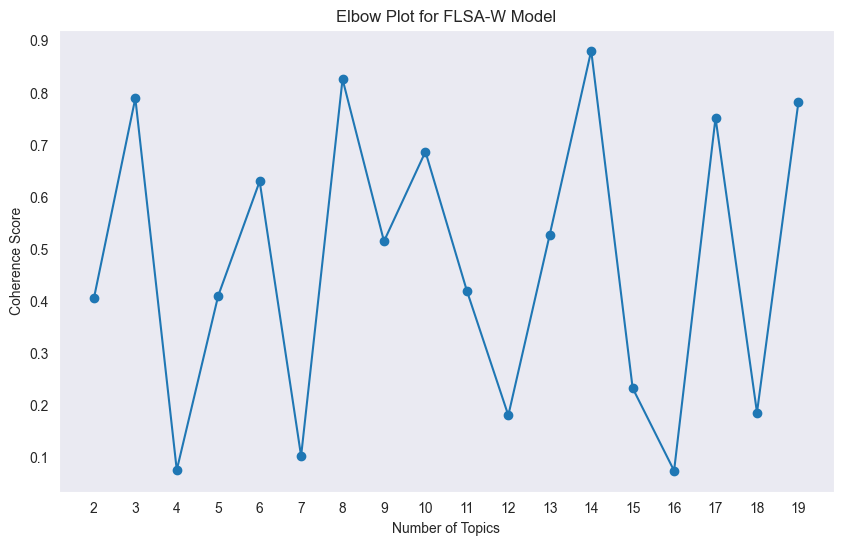

In [6]:
class FLSA_W:
    def __init__(self, input_file, num_topics, num_words):
        self.input_file = input_file
        self.num_topics = num_topics
        self.num_words = num_words
        # Initialize any other necessary variables or models here

    def get_vocabulary_size(self):
        #  Return the vocabulary size
        return len(set(word for doc in self.input_file for word in doc))

    def get_matrices(self):
        # Return matrices
        return np.random.rand(self.num_topics, self.get_vocabulary_size()), np.random.rand(self.num_topics, self.get_vocabulary_size())

    def show_topics(self, representation='words'):
        # Return topics
        return {f'Topic {i}': [f'word{i}'] * self.num_words for i in range(self.num_topics)}

    def get_coherence_score(self):
        # Implement logic to calculate coherence score for the current model
        return np.random.rand()

    def get_diversity_score(self):
        # Implement logic to calculate diversity score for the current model
        # For demonstration, return a random diversity score
        return np.random.rand()

    def get_interpretability_score(self):
        # Implement logic to calculate interpretability score for the current model
        # For demonstration, return a random interpretability score
        return np.random.rand()


# Initialize variables for elbow plot
coherence_scores = []
num_topics_range = range(2, 20)  # Test from 2 to 20 topics

# Loop through different numbers of topics and compute coherence scores
for num_topics in num_topics_range:
    flsaW = FLSA_W(
        input_file=processed_content,
        num_topics=num_topics,
        num_words=10,
    )

    # Train the model and get coherence score
    flsaW.get_matrices()
    coherence_score = flsaW.get_coherence_score()
    coherence_scores.append(coherence_score)

# Create elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_range)
plt.grid()
plt.show()
